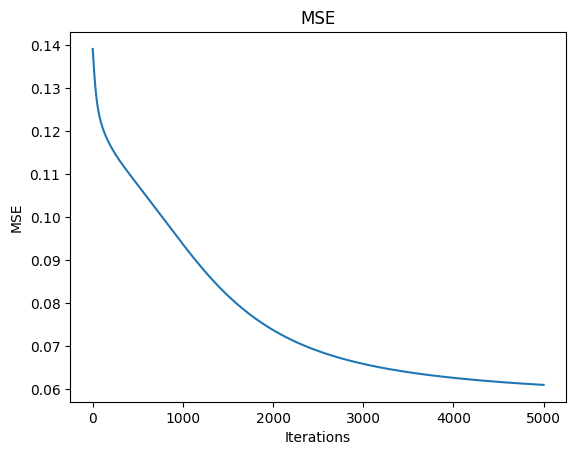

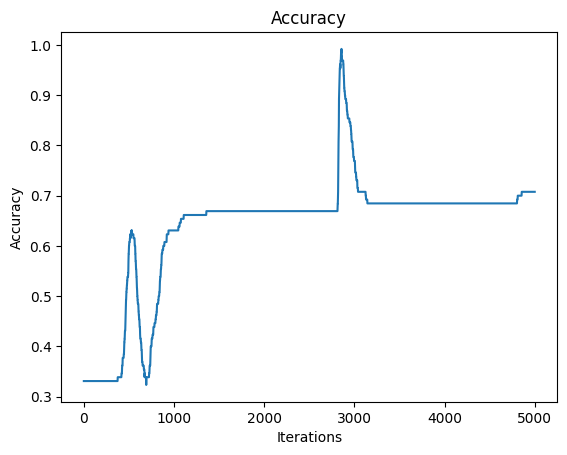

Test Accuracy: 80.00%


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# One-hot encode target labels
y = pd.get_dummies(y).values

# Split data into train and test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=20, random_state=4)

# Hyperparameters
lr = 0.1
iterations = 5000
N = y_tr.size
input_size = 4
hidden_size = 2
output_size = 3

# Results DataFrame
results = pd.DataFrame(columns=["mse", "acc"])

# Initialize weights
np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# MSE loss function
def mse(y_pred, y_true):
    return ((y_pred - y_true) ** 2).sum() / (2 * y_pred.size)

# Accuracy calculation
def acc(y_pred, y_true):
    correct = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return correct.mean()

# Training loop
for i in range(iterations):
    # Forward propagation
    Z1 = np.dot(X_tr, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculate error and accuracy
    error = mse(A2, y_tr)
    accuracy = acc(A2, y_tr)
    
    new_row = pd.DataFrame({"mse": [error], "acc": [accuracy]})
    results = pd.concat([results, new_row], ignore_index=True)

    # Backpropagation
    E1 = A2 - y_tr
    dW1 = E1 * A2 * (1 - A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # Weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_tr.T, dW2) / N

    W2 = W2 - lr * W2_update
    W1 = W1 - lr * W1_update

# Plot MSE and accuracy
results.mse.plot(title="MSE")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

results.acc.plot(title="Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

# Test the model on the test data
Z1_te = np.dot(X_te, W1)
A1_te = sigmoid(Z1_te)
Z2_te = np.dot(A1_te, W2)
A2_te = sigmoid(Z2_te)

test_accuracy = acc(A2_te, y_te)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
